1. downloading dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
test_data = test_data.join(submit_data["label"])

2. analysing dataset

2.1 
TRAIN SET [20800 entries]<br>
id : non-null <br>
title : 558 nulls<br>
author : 1957 nulls<br>
text : 40 nulls<br>
label : non-null<br>
<br>
TEST SET [5200 entries]<br>
id : non-null <br>
title : 122 nulls<br>
author : 500 nulls<br>
text : 7 nulls<br>

In [ ]:
print("column     null count")
train_data.isnull().sum()

column     null count


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
 4   label   5200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 203.2+ KB


2.2 #unique values + highest freq <br>
title : 19803 unique + freq=5 <br>
author : 4201 unique + freq=43 [Pam Key]<br>
text : 20386 unique + freq=75 

In [ ]:
train_data = train_data.drop(columns=["id"])
train_data.describe()

,label
count,18285.000000
mean,0.433361
std,0.495553
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


2.3 removing nulls + analysis

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
#try this after removing nulls [finding title with freq=5, author are diff+text diff but title same]
train_data[train_data['title'].str.contains('Get Ready For Civil Unrest: Survey Finds That ')]

,id,title,author,text,label
3989,3989,Re: Get Ready For Civil Unrest: Survey Finds T...,Bolofia,Print \nCould we see violence no matter who wi...,1
8164,8164,Get Ready For Civil Unrest: Survey Finds That ...,Steve Watson,Get Ready For Civil Unrest: Survey Finds That ...,1
8354,8354,Get Ready For Civil Unrest: Survey Finds That ...,admin,"Economic Collapse October 27, 2016 \nCould we ...",1
10907,10907,Get Ready For Civil Unrest: Survey Finds That ...,Michael Snyder,"in: Protestors & Activists , Special Interests...",1
14771,14771,Get Ready For Civil Unrest: Survey Finds That ...,Michael Snyder,\nCould we see violence no matter who wins on ...,1
15367,15367,Comment on Get Ready For Civil Unrest: Survey ...,Boriqua ConHambrre,"Posted on October 27, 2016 by Michael Snyder \...",1
19555,19555,Get Ready For Civil Unrest: Survey Finds That ...,IWB,Get Ready For Civil Unrest: Survey Finds That ...,1


In [ ]:
#text still has 72 texts which are same - these are " "
train_data.describe(include=object)

,title,author,text
count,18285,18285,18285
unique,17931,3838,18017
top,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,5,243,72


2.4 text field has 72 " ", 1 "  ", and 1 "\n"

In [ ]:
len(train_data[train_data['text'] == ' '])

72

In [ ]:
len(train_data[train_data['text'] == '  '])

1

In [ ]:
len(train_data[train_data['text'] == '\n'])

1

In [ ]:
temp = train_data.text.unique()

In [ ]:
arr = [0 for k in range(0,5)]
count=0
for i in range(0, len(temp)) :
  tempst = temp[i]+""
  if (tempst.strip()==''):
    arr[count] = len(temp[i])
    print("b"+temp[i]+"e")
    count = count + 1;

b e
b  e
b
e


2.5.1 some text is in chinese, symbols in text

In [ ]:
pd.crosstab(index=train_data['text'], columns='freq').tail(2)

col_0,freq
text,
安理会28日会议2016年十月\n俄罗斯总统观注 伏尔泰网 | 纽约（美国） | 2016年10月27日 français English Español русский عربي 联合国与区域及次区域组织在维持国际和平与安全方面的合作：集体安全条约组织、上海合作组织和独立国家联合体 俄罗斯联邦计划在2016年10月28日就“联合国与区域及次区域组织在维持国际和平与安全方面的合作：集体安全条约组织、上海合作组织和独立国家联合体”专题举行一次辩论，作为俄国担任安全理事会主席期间的一项中心工作。\n鉴于当代挑战和威胁的全球性质，要制定采取有效对策所需的集体办法，就必须在维持和平与安全方面，加强联合国与区域和次区域组织的合作。\n就联合国而言，这主要是其普遍性的一种反映，从联合国组织成员的普遍性及其工作的普遍性来看，都市如此；而且也是其国际公认的合法性的体现。另一方面，区域组织对其责任领域的情况往往有更好的认识，在许多情况下，他们都设有适应当地现实情况的预防机制及维和机制。在这方面，区域组织的活动要以寻求新冲突的和平、政治解决为方向。\n正是在此背景下，同联合国主要区域伙伴进行正常协调以处理维持国际和平与安全问题，才具有高度的相关性。例如，安全理事会定期举行会议，讨论与非洲联盟、欧洲安全与合作组织和欧洲联盟合作事宜。近年来，对与阿拉伯国家联盟、东南亚国家联盟、南美洲国家联盟和其它区域行动者合作的情况，进行过审查。\n众所周知，联合国组织同其区域伙伴之间的合作涉及日益广泛的问题。有关方面努力遏制大规模毁灭性武器的扩散和小武器的轻武器的非法流动，打击网络恐怖主义和非法移徙现象，——在所有这些领域，上述组织与联合国之间的合作势头日益增强；此种努力补充了维持和平和建设和平的目标。就在幅员广大的欧亚大陆(尤其是中亚区域)维持和平稳定而言，这一点至关重要。\n正是在此领域，有三个相对年轻的组织，集体安全条约组织、上海合作组织和独立国家联合体(独联体)，在从东欧直至远东的广袤区域开展工作。这些组织正在世界上发挥其政治影响，对加强区域安全和国际安全作出重大贡献。\n辩论将侧重于集体安全条约组织、上海合作组织和独联体对消除该区域和平与安全面临的威胁所作的贡献，包括反恐、打击贩毒和有组织犯罪。此项活动还提供了一个机会，可以在此确认这三个组织对同联合国(包括其中亚地区预防外交中心)切实合作的承诺。\n集体安全条约组织是多层面结构，能对其成员国可能面临的当代广泛的挑战和威胁作出坚定回应。就此而言，联合国与集体安全条约组织在维和方面加强合作的潜力还很大。在集体安全条约组织内部，目前正在加紧工作，发展其自身维和能力，包括可能提供给联合国维和行动的能力。同时，集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力。\n该组织与联合国的关系在许多领域都得到成功的发展：反恐和打击贩毒、维持和平以及控制有组织犯罪。集体安全条约组织与联合国专门机构(包括安全理事会反恐怖主义委员会和联合国毒品和犯罪问题办公室)维持并发展有益的关系。\n大会每两年就联合国与集体安全条约组织之间的合作通过一份决议。计划将在第七十一届会议审议题为“联合国同各区域组织及其他组织的合作”的议程项目范畴内，就此专题通过一份决议。\n2010年，联合国秘书处与上海合作组织秘书处签署关于双方合作的联合声明，为两组织按照《联合国宪章》第八章就国际和平与安全问题开展合作提供了法律框架。目前，上海合作组织与联合国在下列领域开展积极合作：预防和解决冲突、反恐(为此目的，上海合作组织内的区域反恐结构正在运作)、不扩散大规模毁灭性武器、打击跨国犯罪、非法贩运毒品以及确保国际信息安全。\n在此范畴内，上海合作组织积极支持国际社会和联合国机构努力恢复阿富汗和平，并一贯主张联合国在解决阿富汗问题进程中发挥关键的协调作用。\n合作确保安全以及应对当代的挑战和威胁，一直是，并将继续是，独联体成员国之间开展专题合作的优先领域之一。\n同国际组织开展建设性合作，也是积极消除新出现的威胁方面的关键因素。独联体国家加入了有关确保安全、裁军和消除当代挑战和威胁的所有最重要的国际文书，并正为实施此类文书作出重大贡献。\n考虑到联合国的关键作用，考虑到必须与其他国际机构及其专门机构(反恐怖主义委员会、联合国毒品和犯罪问题办公室、国际刑事警察组织、国际移徙组织、联合国难民事务高级专员公署和反洗钱金融行动任务组)发展建设性伙伴关系，目前正在采取联合措施。\n联合国与集体安全条约组织、上海合作组织和独联体在《联合国宪章》第八章基础上进一步加强和加深合作，在推进联合国组织各项目标方面正在发挥建设性作用，包括应对当代的挑战和威胁。一方面，这些区域组织应当积极作好准备，发挥自身潜力，维护联合国利益。另一方面，对于加大联合国与这些组织的协调与合作，联合国本身应继续给予必要重视，同时应坚持联合国及安全理事会的特权。\n在此背景下，我们谨建议会员国就如何利用现有区域机制加强欧亚区域安全，提出自己的观点。很显然，该次区域的稳定将是欧亚各国经济增长和国家建设的基础，因此，我们欢迎各国代表团提出看法，包括通过安全与发展相结合这样做。我们坚信，在这里，在具有普遍合法性的联合国，我们将能够为处理稳定弱势区域的问题，集体提出创新办法，嗣后可推广到安全理事会重点关注的世界其他地区。\n在辩论期间，联合国秘书长潘基文、集体安全条约组织秘书长博尔久扎、上海合作组织秘书长阿利莫夫以及独联体执行委员会副主席伊凡诺夫将发表讲话。我们也邀请上述区域组织成员国和其他有关国家的代表参加此次会议。,1
"🚨Bill Clinton and Hillary Lolita Express Pedophilia Ring🚨 11/04/2016 In today’s video, Christopher Greene of AMTV breaks down the connection between convicted felon Jefferey Epstein ‘known pedophile” and the Clinton’s. Will this be the next shoe to drop in the Wikileaks Podesta dump? Will find out this weekend in an Exclusive RT interview with the man himself Julian Assange. Analyst: Most Americans like neither Candidate 11/04/2016 PRESS TV US Democratic presidential candidate Hillary Clinton’s unpopularity among American voters has reached a new h ... Crack in Earth’s magnetic shield detected 11/04/2016 DNA INDIA The world's largest and most sensitive cosmic ray monitor, located in India, has recorded a burst of galact ... Feds warn NYC officials about possible al Qaeda attack 11/04/2016 NEW YORK POST New York City law enforcement authorities are on high alert after receiving a warning by the feds about ... AMTV Archives",1


2.5.2 some authors are labelled as -NO AUTHOR- [remove these? as no-author might bias the model? can we instead replace all null authors with -NO AUTHOR- (instead of removing them)? <br>
some authors not in english<br>
some authors have titles included in them

In [ ]:
pd.crosstab(index=train_data['author'], columns='freq')

col_0,freq
author,
# 1 NWO Hatr,17
-NO AUTHOR-,54
10 Habits That Will Make Your Life Easier &amp; More Peaceful - Wellness Solutions,1
"10 More Beautiful Images That Remind You We Still Live In A Beautiful World, With Beautiful People - Upside Down Media",1
10 Movies That Could Change Your Understanding Of Life - Upside Down Media,1
...,...
تييري ميسان,1
جنگ ارزی آمریکا علیه ایران / مورد مطالعاتی سال 1390 - کدآمایی,1
سعيد هلال الشريفي,1


2.6 univariate analysis - labels not equally distributed in train_data

In [ ]:
x = train_data['label']
df = pd.DataFrame(x,columns=['label'])

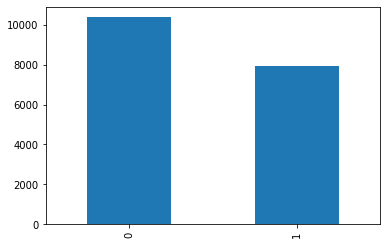

In [ ]:
freq_classType = df['label'].value_counts()
freq_classType.plot.bar()

2.6 Removing duplicate rows - no duplicate rows in either train or test data

In [ ]:
duplicate_rows_traindata = train_data[train_data.duplicated()]
duplicate_rows_traindata.shape

(0, 5)

In [ ]:
duplicate_rows_testdata = test_data[test_data.duplicated()]
duplicate_rows_testdata.shape

(0, 4)

2.7 Detecting Outliers using IQR score technique [https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba]

2.8 Plot each categorical feature - Sparse classes which have the potential to affect a model’s performance

In [ ]:
for column in train_data.select_dtypes(include='object'):
    if train_data[column].nunique() < 10:
        sns.countplot(y=column, data=train_data)
        plt.show()

2.9 correlation - after numeralizing the objects

In [ ]:
corrs = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

PREPROCESSING OBJECT COLUMNS

In [ ]:
# Checking null values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)


# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
#lower casing train data
train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
#dropping index and id columns [index column??]
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
train_data.shape

(18211, 4)

In [ ]:
test_data.shape

(5200, 5)

In [ ]:
test_data.dropna(inplace=True)
test_data.drop(test_data.loc[test_data['text']==" "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="  "].index, inplace=True)
test_data.drop(test_data.loc[test_data['text']=="\n"].index, inplace=True)


In [ ]:
test_data.shape

(5169, 5)

In [ ]:
#lower casing test data
test_data= test_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
#dropping id column
test_data.drop(columns=["id"])

In [ ]:
import nltk

import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_set = set(stopwords.words('english'))

sw_removed = []

for i in range(len(train_data)):
    review = re.sub('[^a-zA-Z]',' ',train_data['text'][i])
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    sw_removed.append(statements)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

stemmed = []

print(len(sw_removed))

for i in range(len(sw_removed)):
  sw_removed_1 = sw_removed[i].split()
  stem = [ps.stem(word) for word in sw_removed_1]
  st = ' '.join(stem)
  stemmed.append(st)

In [ ]:
preprocess_arr = np.array(stemmed)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=3000)

train_input = vectorizer.fit_transform(preprocess_arr).toarray()
transformed_df = pd.DataFrame(data=train_input, columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
transformed_df

,00,000,000 peopl,10,10 000,10 year,100,100 000,11,12,...,york citi,york time,young,young peopl,younger,youth,youtub,zero,zika,zone
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.022515,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.024865,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.021322,0.0,0.022350,0.041067,0.0,0.0,0.0,0.052250,0.028601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18283,0.0,0.000000,0.0,0.038645,0.000000,0.0,0.0,0.0,0.045172,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
transformed_df.columns

Index(['00', '000', '000 peopl', '10', '10 000', '10 year', '100', '100 000',
       '11', '12',
       ...
       'york citi', 'york time', 'young', 'young peopl', 'younger', 'youth',
       'youtub', 'zero', 'zika', 'zone'],
      dtype='object', length=3000)

Obs1 : need to remove numbers<br>
Obs2 : why are some words missing the last e? peopl, youtub<br>

2.10 Bivariate analysis <br>
a. strong correlation bw title and text [we can drop title column]<br>


In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
confusion_matrix = pd.crosstab(train_data["title"], train_data["author"])
cramers_v(confusion_matrix.values)

0.3684637902602711

In [ ]:
confusion_matrix = pd.crosstab(train_data["title"], train_data["text"])
cramers_v(confusion_matrix.values)

0.4111885524222414

see if all title strings are in text strings - there are some words which occur in title but not in text

In [ ]:
i = 0
for titl in train_data['title']:
  arr = titl.replace(":","").split(" ")
  tex = train_data['text'][i]
  for j in arr:
    if (tex.find(j) == -1):
      print(j)
      print(i)
      break
  i += 1